In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("50_Startups.csv")

In [5]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data=data.sort_values(by="Profit").reset_index(drop=True)

In [7]:
#Here is algorithm for intersection over IQR in all columns one by one.
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
data_columns=[]
data2={}
a=[]
intersection=[]

for i in data.columns:
    if data[str(i)].dtype=='int' or data[str(i)].dtype=='float':
        data_columns.append(i)
        data2["{0}".format(i)] =data[(data[str(i)]> lower_limit[str(i)])&(data[str(i)]< upper_limit[str(i)])]
for i in data2:
    for i in [i for i in list(data2[i].index)]:
        a.append(i)
for i in a:
    if a.count(i)==len(data_columns):
        intersection.append(i)
data=data.loc[intersection].drop_duplicates()

In [8]:
data=data.sort_values(by="Profit").reset_index(drop=True)

In [9]:
x=data.drop("Profit",axis=1)

In [10]:
y=data.Profit

In [11]:
x=pd.get_dummies(x,drop_first=True)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x.values,y.values,test_size=0.33,random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred=regressor.predict(x_test)

In [15]:
son=pd.DataFrame({"Gercek":y_test,"Tahmin":y_pred},columns=["Gercek","Tahmin"])

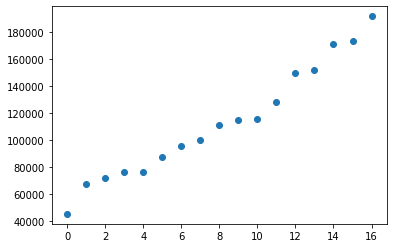

In [16]:
son.sort_values(by="Tahmin",inplace=True)
son.reset_index(drop=True,inplace=True)
plt.scatter(data=son,x=son.index,y="Tahmin")

In [17]:
list(son.index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

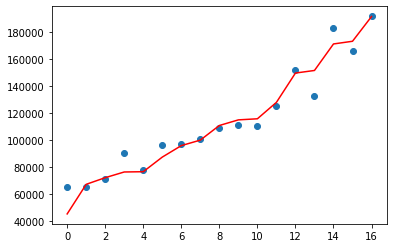

In [18]:
plt.plot(list(son.index), son["Tahmin"], color='red')
plt.scatter(data=son,x=list(son.index),y="Gercek")

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9477640188534169

In [20]:
son

,Gercek,Tahmin
0,64926.08,45346.945632
1,65200.33,67270.964749
2,71498.49,72193.069833
3,90708.19,76414.383873
4,78239.91,76613.173540
5,96479.51,87439.901260
6,97483.56,95943.840062
7,101004.64,100029.003642
8,108733.99,110853.632489
9,111313.02,115019.436989
